# Decision Tree

In [1]:
#Imports
import pandas as pd

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [2]:
# Read the csv and create a dataframe
exoplanet_complete_kNN = pd.read_csv('exoplanet_complete_kNN.csv')
exoplanet_complete_kNN.head()

,koi_disposition,koi_score,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1,1.000,9.488036,170.538750,0.146,2.95750,615.8,2.26,793,93.59,5455,4.467,0.927,291.93423,48.141651,15.347
1,1,0.969,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,5455,4.467,0.927,291.93423,48.141651,15.347
2,3,0.000,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,5853,4.544,0.868,297.00482,48.134129,15.436
3,3,0.000,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,5805,4.564,0.791,285.53461,48.285210,15.597
4,1,1.000,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,6031,4.438,1.046,288.75488,48.226200,15.509


### key for koi_disposition:
1 = CONFIRMED, 
2 = CANDIDATE, 
3 = FALSE POSITIVE


In [3]:
# Set up the target column and the target names
target = exoplanet_complete_kNN["koi_disposition"]
target_names = ["1", "2", "3"]

In [4]:
# Set up data and feature names; display dataframe after koi_disposition is dropped
data = exoplanet_complete_kNN.drop("koi_disposition", axis=1)
feature_names = data.columns
data.head()

,koi_score,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1.000,9.488036,170.538750,0.146,2.95750,615.8,2.26,793,93.59,5455,4.467,0.927,291.93423,48.141651,15.347
1,0.969,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,5455,4.467,0.927,291.93423,48.141651,15.347
2,0.000,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,5853,4.544,0.868,297.00482,48.134129,15.436
3,0.000,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,5805,4.564,0.791,285.53461,48.285210,15.597
4,1.000,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,6031,4.438,1.046,288.75488,48.226200,15.509


In [5]:
# Separate data into train and test buckets
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
# Decision Tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8224112056028015

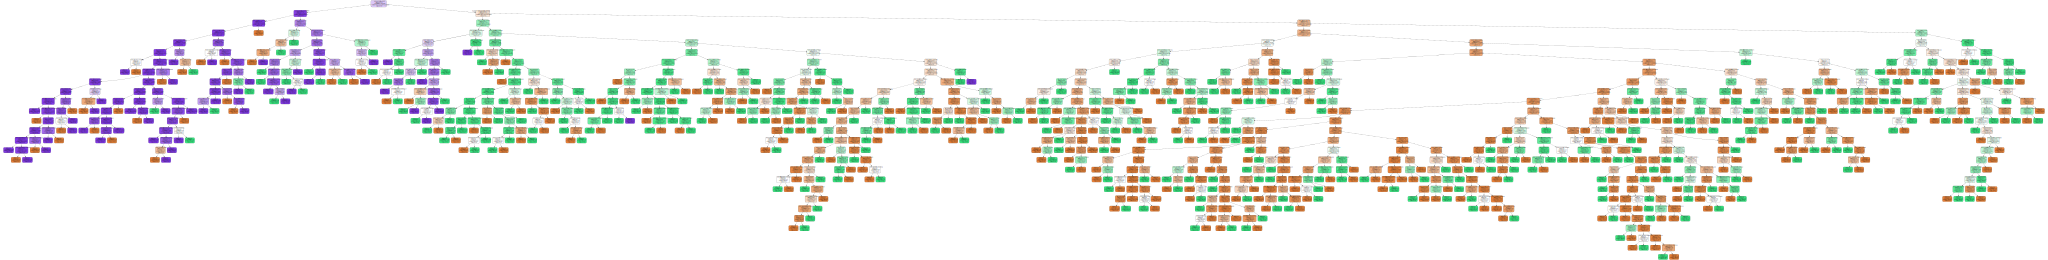

In [7]:
# Graph the Decision Tree (scroll down and to the right until the boxes appear below)
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('planet.png')

graph = graphviz.Source(dot_data)  
graph 

# See the Summary below the graphed tree.

# Summary:

### Decision Tree:  82.2%